## Librerias a utilizar


In [ ]:
import numpy as np
import time
from tqdm import *
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from time import process_time
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, make_circles
from sklearn.metrics import f1_score , accuracy_score
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel
import csv
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel,euclidean_distances
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

> Si se desea utilizar archivos csv para realizar la clasificación

In [ ]:
"""
Si se desea utilizar unos datos en especifico
#path_datos='/content/drive/MyDrive/datos_prueba/datos_medianos/shuttle_test.csv'
#path_datos='/content/drive/MyDrive/datos_prueba/datos_pequenos/segment.csv'
#path_datos='/content/drive/MyDrive/datos_prueba/datos_pequenos/spambase.csv'
#path_datos='/content/drive/MyDrive/datos_prueba/airline_minmax.csv'
df=pd.read_csv(path_datos)
labelencoder= LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1]) 
data=list()
data={'data':np.array(df.iloc[:,:-1]),'target':np.array(df.iloc[:,-1])}
"""

"\nSi se desea utilizar unos datos en especifico\n#path_datos='/content/drive/MyDrive/datos_prueba/datos_medianos/shuttle_test.csv'\n#path_datos='/content/drive/MyDrive/datos_prueba/datos_pequenos/segment.csv'\n#path_datos='/content/drive/MyDrive/datos_prueba/datos_pequenos/spambase.csv'\n#path_datos='/content/drive/MyDrive/datos_prueba/airline_minmax.csv'\ndf=pd.read_csv(path_datos)\nlabelencoder= LabelEncoder()\ndf.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1]) \ndata=list()\ndata={'data':np.array(df.iloc[:,:-1]),'target':np.array(df.iloc[:,-1])}\n"

> Cargamos los datos iris

In [ ]:
data=load_iris()
X = np.array(data['data'][:,:])
y = np.array(data['target'])
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.1, random_state=0)#

In [ ]:
#Definimos las expresion de distancia en el espacio kernel
def distancia_gaussiana(x, y, **kwargs):
  return 2-np.exp(-kwargs["gamma"]*np.linalg.norm(x-y)**2) 
def distancia_polynomial(x, y, **kwargs):
  return np.dot(x,x)**kwargs["param_d"]+np.dot(y,y)**kwargs["param_d"]-2*np.dot(x,y)**kwargs["param_d"] 
def distancia_sigmoidal(x, y, **kwargs):
  return np.tanh(np.dot(x,x)+kwargs["param_d"])+np.tanh(np.dot(y,y)+kwargs["param_d"])-2+np.tanh(np.dot(x,y)+kwargs["param_d"]) 
def distancia_cuadratico_racional(x, y, **kwargs):
  return 2 - 2 * (1 - ( (np.linalg.norm(x-y)**2) / (np.linalg.norm(x-y)**2+kwargs["gamma"])))
def distancia_t_student_generalizado(x, y, **kwargs):
  return 2- (2/(1+ np.linalg.norm(x-y)**kwargs["param_d"]))
def distancia_nucleo_cauchy(x, y, **kwargs):
  return 2- 2*(1/( 1 + ((np.linalg.norm(x-y)**2)))) 

### kernel knn polynomial

> parametros kernel polynomial [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
> #Probamos como funciona para un unico valor train-test y para el kernel polynomial

In [ ]:
grilla_de_parametros = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
for p in grilla_de_parametros:
  kknn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree',metric=distancia_polynomial, metric_params={"param_d": p})
  kknn.fit(X_train, y_train)
  y_predicho = kknn.predict(X_test)
  print('parametro:',p, f1_score(y_test,y_predicho,average='macro'))

parametro: 1 1.0
parametro: 2 1.0
parametro: 3 1.0
parametro: 4 1.0
parametro: 5 1.0
parametro: 6 1.0
parametro: 7 1.0
parametro: 8 1.0
parametro: 9 1.0
parametro: 10 1.0
parametro: 11 1.0
parametro: 12 1.0
parametro: 13 1.0
parametro: 14 1.0
parametro: 15 1.0
parametro: 16 1.0
parametro: 17 1.0


## Kernel knn gaussiano
> #Probamos como funciona para un unico valor train-test y para el kernel rbf

In [ ]:
grilla_de_parametros = [0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]
for p in grilla_de_parametros:
  nbrs = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree',metric=distancia_gaussiana, metric_params={"gamma": p})
  nbrs.fit(X_train, y_train)
  y_predicho = nbrs.predict(X_test)
  print('parametro:',p, 'f1_score:', f1_score(y_test,y_predicho,average='macro'))

parametro: 1e-06 f1_score: 1.0
parametro: 5e-06 f1_score: 1.0
parametro: 1e-05 f1_score: 1.0
parametro: 5e-05 f1_score: 1.0
parametro: 0.0001 f1_score: 1.0
parametro: 0.0005 f1_score: 1.0
parametro: 0.001 f1_score: 1.0
parametro: 0.005 f1_score: 1.0
parametro: 0.01 f1_score: 1.0
parametro: 0.05 f1_score: 1.0
parametro: 0.1 f1_score: 1.0
parametro: 0.5 f1_score: 1.0
parametro: 1 f1_score: 1.0
parametro: 5 f1_score: 1.0
parametro: 10 f1_score: 1.0
parametro: 50 f1_score: 1.0


In [ ]:
## Comparacion con el algoritmo original KNN, distancia euclideana
nbrs = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
nbrs.fit(X_train, y_train)
y_predicho = nbrs.predict(X_test)
f1_score(y_test,y_predicho,average='macro')

1.0

# Validación cruzada para tener una idea del rendimiento real

In [ ]:
recolector_scores = []
grilla_de_parametros = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for p in grilla_de_parametros:
  kknn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree',metric=distancia_polynomial,metric_params={"param_d": p })
  scores = cross_val_score(kknn, X_train, y_train, cv=5,scoring='f1_macro')
  recolector_scores.append(np.mean(scores))

In [ ]:
nbrs = KNeighborsClassifier(n_neighbors=1,metric='euclidean')
score_euclidean = cross_val_score(nbrs, X_train, y_train, cv=5,scoring='f1_macro')
np.mean(score_euclidean)

0.9526027189185085

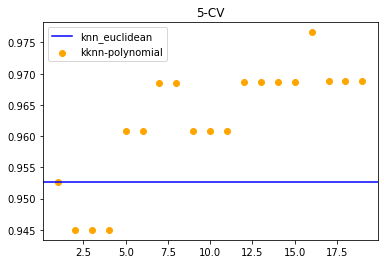

In [ ]:
import matplotlib.pyplot as plt
plt.title('5-CV')
plt.scatter(grilla_de_parametros,recolector_scores,color='orange',label='kknn-polynomial')
plt.axhline(np.mean(score_euclidean),color='blue',label='knn_euclidean')
plt.legend()
plt.show()